In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.json to dataset.json


# Prepocess the data

In [2]:
import pandas as pd

df = pd.read_json("dataset.json", lines = True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   content     20001 non-null  object 
 1   annotation  20001 non-null  object 
 2   extras      0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 468.9+ KB


,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


As we can see that the column extras is null so we will drop it.

In [3]:
#dropped columns where all values were null
df = df.dropna(axis = 1, how = 'all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


## Visualize the data

### No. of bullying comments vs No. of non-bullying comments

{'notes': '', 'label': ['0']}    12179
{'notes': '', 'label': ['1']}     7822
Name: annotation, dtype: int64


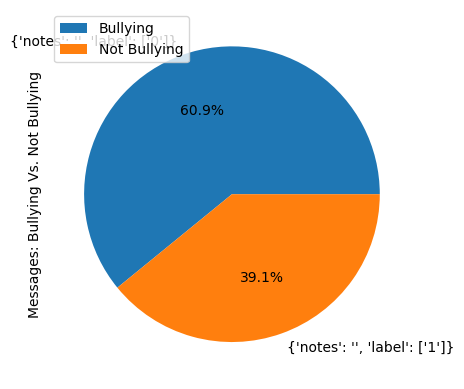

In [4]:
import matplotlib.pyplot as plt

count = ""
count = df["annotation"].value_counts()
print(count)

count.plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel("Messages: Bullying Vs. Not Bullying")
plt.legend(["Bullying", "Not Bullying"])

### Frequency of each words

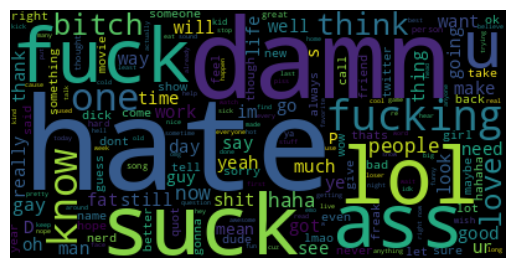

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud().generate(" ".join(df['content']))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

As annotations are not in int for it will be hard to convert to classes therfore convert to int.

In [6]:
df.loc[df['annotation'] == {'notes': '', 'label': ['1']}, 'annotation'] = 1
df.loc[df['annotation'] == {'notes': '', 'label': ['0']}, 'annotation'] = 0
df.info()
df['annotation'] = df['annotation'].astype(int)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [7]:
X=df['content']
y=df['annotation']

print(X)
type(X)

0                                   Get fucking real dude.
1         She is as dirty as they come  and that crook ...
2         why did you fuck it up. I could do it all day...
3         Dude they dont finish enclosing the fucking s...
4         WTF are you talking about Men? No men thats n...
                               ...                        
19996      I dont. But what is complaining about it goi...
19997     Bahah  yeah i&;m totally just gonna&; get pis...
19998         hahahahaha >:) im evil mwahahahahahahahahaha
19999              What&;s something unique about Ohio? :)
20000                Who is the biggest gossiper you know?
Name: content, Length: 20001, dtype: object


pandas.core.series.Series

## Performing NLP

In [8]:
#importing all the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import WordNetCorpusReader
from nltk.corpus.reader import wordnet
nltk.download('stopwords')
stop_words = stopwords.words('english')
import string
nltk.download(['punkt','wordnet'])
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Dimensionality Reduction

Removing all characters that are not letters and tokenize.
Removing stopwords and doing lemmatization.

In [9]:
def tokenize_lemma(text):#user defined/ custom tokenizer - with lemma power - ADD POS afterwards
  tokens=nltk.word_tokenize(text)

  lemm=nltk.WordNetLemmatizer()

  clean_tokens=[]
  for tok in tokens:
     tag=nltk.pos_tag([tok])[0][1][0]
     tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
     }
     print(tag)
     tag_dict=tag_dict.get(tag,wordnet.NOUN)
     print(lemm.lemmatize(tok,tag_dict))
     clean_tokens.append(lemm.lemmatize(tok,tag_dict))
  return clean_tokens

### Doing word vectorization

Splitting data into test and train

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Bag of words approach

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a new vectorizer and fit it on training and testing data
cv_new = CountVectorizer()
X_train_preprocessed = cv_new.fit_transform(X_train)
X_test_preprocessed = cv_new.transform(X_test)

# Fit classification models
We will be using


1.   Logistic Regression
2.   Support Vector Machine(SVM)
3.   Gaussian Naive Bayes




In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=30000)
logistic_regression.fit(X_train_preprocessed, y_train)

LogisticRegression(max_iter=30000)

Predicting the test data and evaluating the model accuracy(cost of FP=FN).

In [19]:
y_pred = logistic_regression.predict(X_test_preprocessed)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.8191968005332445
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      3662
           1       0.75      0.81      0.78      2339

    accuracy                           0.82      6001
   macro avg       0.81      0.82      0.81      6001
weighted avg       0.82      0.82      0.82      6001



## Gaussian Naive Bayers

In [22]:
from sklearn.naive_bayes import GaussianNB

X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

gnb=GaussianNB()
gnb.fit(X_train_preprocessed,y_train)

GaussianNB()

Predicting the test data and evaluating the model accuracy(cost of FP=FN).

In [23]:
y_pred = gnb.predict(X_test_preprocessed)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.6295617397100484
              precision    recall  f1-score   support

           0       0.94      0.42      0.58      3662
           1       0.51      0.96      0.67      2339

    accuracy                           0.63      6001
   macro avg       0.73      0.69      0.62      6001
weighted avg       0.77      0.63      0.61      6001



In [24]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_preprocessed, y_train)

SVC(kernel='linear')

Predicting the test data and evaluating the model accuracy(cost of FP=FN).

In [25]:
y_pred = clf.predict(X_test_preprocessed)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.8331944675887352
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3662
           1       0.74      0.88      0.80      2339

    accuracy                           0.83      6001
   macro avg       0.83      0.84      0.83      6001
weighted avg       0.85      0.83      0.84      6001



# Conclusion
The best model to use would be logistic regession.
The reasons are:

1.   GaussianNB has very low accuracy
2.   SVC had an 1% highr accuracy making it almost the same and it will took way too long to train, the dataframe as alot of records, making it impacrtical.

# Testing with user input data using GradIO

In [26]:
!pip install gradio
!pip install transformers
!pip install pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.1 MB/s eta 0:

In [33]:
import pickle
import gradio as gr

In [35]:
def predict_comment(comment):
    transformed_comment = cv_new.transform([comment])
    print(y_pred)
    return "Bullying Comment" if int(y_pred[0]) == 1 else "Non-Bullying Comment"

In [ ]:
iface = gr.Interface(
    fn=predict_comment,
    inputs=gr.inputs.Textbox(placeholder="Enter a comment"),
    outputs="text"
)

# Launch the interface

iface.launch(debug=True)

<ipython-input-36-a43b23d54485>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(placeholder="Enter a comment"),
<ipython-input-36-a43b23d54485>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(placeholder="Enter a comment"),
<ipython-input-36-a43b23d54485>:3: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(placeholder="Enter a comment"),


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

[0 1 0 ... 1 0 1]
